# 轉折判斷法(Elbow)

## 載入相關套件

In [1]:
import numpy as np

## 生成分類資料

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

## 訓練模型

In [3]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
)

## 模型評估

In [4]:
# 顯示失真(Distortion)的程度
y_km = km.fit_predict(X)
print("Distortion: %.2f" % km.inertia_)

Distortion: 72.48


## 轉折判斷法(Elbow)

In [5]:
distortions = []
# 測試 1~10 群的失真
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

## 繪圖

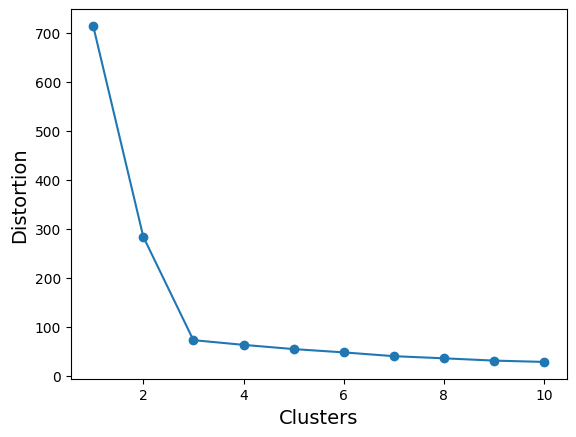

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("Distortion", fontsize=14);